In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import datetime as dt

## IMPORTANDO  E TRATANDO DADOS DE SEGMENTOS DO STRAVA

In [2]:
# Dados obtidos da api do strava https://developers.strava.com/docs/reference/
# por meio de um app em python que foi desenvolvido para obter os dados, trasnformar e 
# gravar em csv separado por ';'

df = pd.read_csv("stravaWSDetalhe.csv", delimiter=';', parse_dates=['start_date', 'start_date_local'])

In [3]:
df['start_date'] = pd.to_datetime(df['start_date'],  format='%Y%m%d', utc=False).dt.date
df['start_date'] = df['start_date'].astype('datetime64[ns]')

df['vse_start_latitude'].astype('float')

0      -20.392717
1      -20.393215
2      -20.393521
3      -20.395038
4      -20.396506
          ...    
5507   -20.352329
5508   -20.352351
5509   -20.353519
5510   -20.352351
5511   -20.353519
Name: vse_start_latitude, Length: 5512, dtype: float64

In [4]:
df = df[df['vse_average_watts'] != 0]
df = df[df['vse_average_heartrate'] != 0]

In [5]:
df.shape

(1697, 33)

In [6]:
df.describe()

,distance,moving_time,elapsed_time,total_elevation_gain,id,kudos_count,average_speed,max_speed,average_watts,kilojoules,...,vse_distance,vse_elapsed_time,vse_max_heartrate,vse_moving_time,vse_elevation_high,vse_elevation_low,vse_start_latitude,vse_start_longitude,vse_end_latitude,vse_end_longitude
count,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,...,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,28317.918562,5467.386565,6477.428992,163.821096,1.922782e+09,14.631703,5.211740,10.486152,161.015439,875.935887,...,3640.712434,714.414260,141.825575,636.748969,11.244255,0.220153,-20.419028,-40.324213,-20.421825,-40.325318
std,3537.800249,768.825245,1107.527661,66.949740,4.794097e+08,7.001466,0.491769,1.450688,14.136780,111.505645,...,4110.950159,883.981422,13.666478,717.683239,7.004403,4.218716,0.045122,0.022400,0.045907,0.023047
min,12331.500000,2214.000000,2302.000000,44.800000,1.281568e+09,0.000000,3.728000,6.700000,123.500000,368.800000,...,166.600000,30.000000,68.000000,30.000000,-3.200000,-8.800000,-20.486974,-40.360662,-20.486917,-40.360624
25%,27588.900000,5156.000000,5884.000000,134.800000,1.468609e+09,9.000000,5.078000,9.500000,153.100000,829.100000,...,995.400000,162.000000,134.000000,162.000000,7.600000,-2.900000,-20.456570,-40.340167,-20.454327,-40.337981
50%,29068.700000,5465.000000,6268.000000,144.300000,1.994719e+09,14.000000,5.397000,10.700000,164.200000,889.800000,...,2664.400000,479.000000,144.000000,464.000000,9.800000,-0.400000,-20.427257,-40.329905,-20.438855,-40.332232
75%,30516.300000,5810.000000,6780.000000,159.800000,2.204492e+09,19.000000,5.555000,11.400000,171.700000,960.800000,...,5078.600000,935.000000,152.000000,899.000000,16.400000,2.000000,-20.393521,-40.317364,-20.396368,-40.319373
max,34719.800000,7390.000000,9964.000000,377.400000,2.802778e+09,32.000000,5.791000,14.600000,183.000000,1060.600000,...,22479.900000,5028.000000,173.000000,4345.000000,43.400000,31.200000,-20.321809,-40.268613,-20.321643,-40.268728


In [7]:
import math 

def calculate_initial_compass_bearing(pointA, pointB):
    """
    Calculates the bearing between two points.
    The formulae used is the following:
        θ = atan2(sin(Δlong).cos(lat2),
                  cos(lat1).sin(lat2) − sin(lat1).cos(lat2).cos(Δlong))
    :Parameters:
      - `pointA: The tuple representing the latitude/longitude for the
        first point. Latitude and longitude must be in decimal degrees
      - `pointB: The tuple representing the latitude/longitude for the
        second point. Latitude and longitude must be in decimal degrees
    :Returns:
      The bearing in degrees
    :Returns Type:
      float
    """
    if (type(pointA) != tuple) or (type(pointB) != tuple):
        raise TypeError("Only tuples are supported as arguments")

    lat1 = math.radians(pointA[0])
    lat2 = math.radians(pointB[0])

    diffLong = math.radians(pointB[1] - pointA[1])

    x = math.sin(diffLong) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - (math.sin(lat1)
            * math.cos(lat2) * math.cos(diffLong))

    initial_bearing = math.atan2(x, y)

    # Now we have the initial bearing but math.atan2 return values
    # from -180° to + 180° which is not what we want for a compass bearing
    # The solution is to normalize the initial bearing as shown below
    initial_bearing = math.degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360

    return compass_bearing


# Determinando angulo do vento em função doa lat e long

df['angulo_vento_segmento'] = df.apply(lambda x: calculate_initial_compass_bearing( (x['vse_start_latitude'],x['vse_start_longitude']), (x['vse_end_latitude'],x['vse_end_longitude']) ), axis=1)


In [8]:
def conv_dir_vento(gdirvento):
    pt = ""
    if gdirvento >= 0 and gdirvento < 22.5:
        pt = 'N'
    elif gdirvento >= 22.5 and gdirvento < 67.5:
        pt = 'NE'
    elif gdirvento >= 67.5 and gdirvento < 112.5:
        pt = 'E'
    elif gdirvento >= 112.5 and gdirvento < 157.5:
        pt = 'SE'
    elif gdirvento >= 157.5 and gdirvento < 202.5:
        pt = 'S'
    elif gdirvento >= 202.5 and gdirvento < 247.5:
        pt = 'SW'
    elif gdirvento >= 247.5 and gdirvento < 292.5:
        pt = 'W'
    elif gdirvento >= 292.5 and gdirvento < 337.5:
        pt = 'NW'
    elif gdirvento >= 337.5:
        pt = 'N'
        
    return pt

# Determinando a direção do vento do segmento em função do angulo

df['direcao_do_vento_segmento'] = df['angulo_vento_segmento'].apply(lambda x: conv_dir_vento(x))

In [9]:
# convert kj para calorias
# https://stagescycling.com/de/news/what-it-means-watts-to-kjs-to-kcals/

df['burn_calories'] = ((df['kilojoules'] / 4.186) / 0.22)

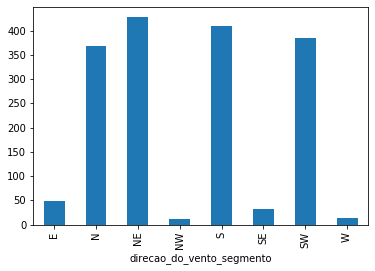

In [10]:
# Explorando a distribuição da direção dos ventos nos segmentos

df.groupby(df['direcao_do_vento_segmento'])['id'].count().plot(kind='bar')

In [11]:
# Removendo colunas desnecessárias 

df = df.drop(['id', 'name', 'kudos_count', 'vse_name', 'vse_id', 'vse_split_segmento', 'angulo_vento_segmento', 'type', 'distance','moving_time','elapsed_time','total_elevation_gain','start_date_local','max_speed','average_watts','kilojoules','average_heartrate','max_heartrate','elev_high','elev_low', 'vse_start_latitude','vse_start_longitude','vse_end_latitude','vse_end_longitude'], axis=1)

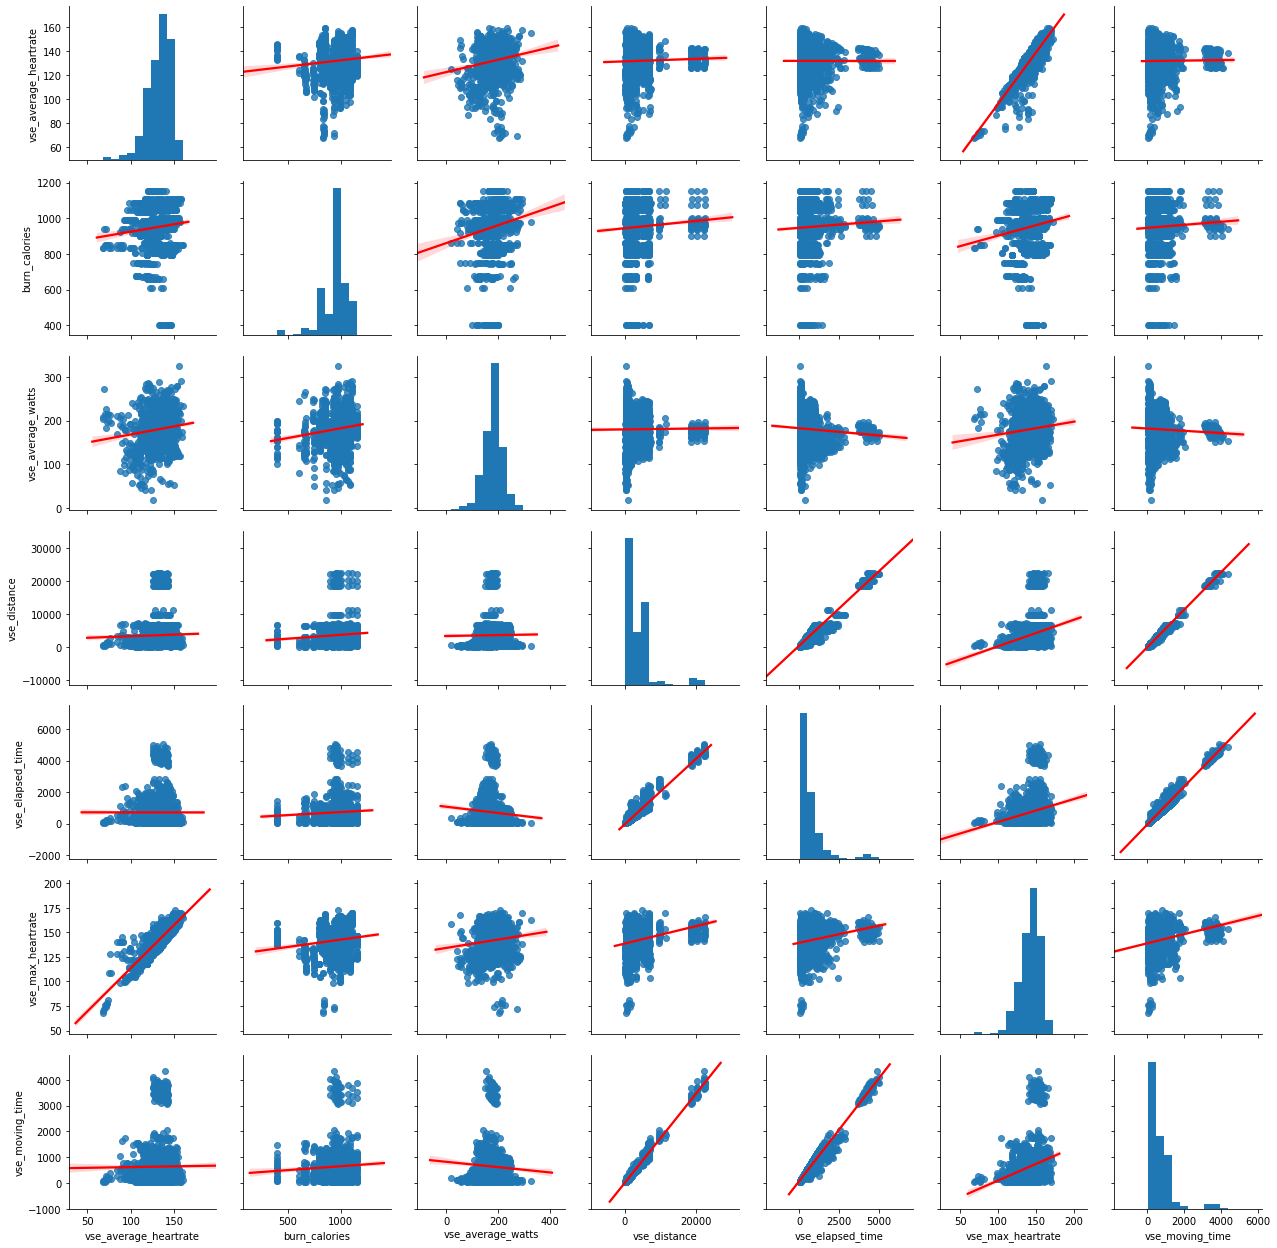

In [12]:
# Explorando rapidamente a distribuição e tendencias de vários dados dos segmentos sem levar 
# em conta a direção do segmento vs a direção do vento, mas o mais importante neste momemtno 
# é entender os dados para gerar insignts

sns.pairplot(df[['vse_average_heartrate','burn_calories', 'vse_average_watts', 'vse_distance', 'vse_elapsed_time', 'vse_max_heartrate', 'vse_moving_time']], kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [13]:

# nota: as variaveis vse_distance, vse_elapsed_time e vse_moving_time tem um comportamento 
# tendencional similar quando comparado as demais variaveis


In [14]:
df.tail()

,start_date,average_speed,vse_average_heartrate,vse_average_watts,vse_distance,vse_elapsed_time,vse_max_heartrate,vse_moving_time,vse_elevation_high,vse_elevation_low,direcao_do_vento_segmento,burn_calories
1737,2017-11-19,3.993,106.4,139.0,3126.6,1150.0,113.0,752.0,22.0,0.0,SW,678.234809
1738,2017-11-19,3.993,107.9,125.5,6510.7,1648.0,116.0,1568.0,22.8,0.0,SW,678.234809
1739,2017-11-19,3.993,106.3,127.3,651.1,158.0,111.0,158.0,15.1,7.1,SW,678.234809
1740,2017-11-19,3.993,105.5,126.0,197.6,45.0,110.0,45.0,4.7,0.0,S,678.234809
1741,2017-11-19,3.993,109.9,108.0,2238.7,631.0,116.0,551.0,16.0,0.0,SW,678.234809


## IMPORTANDO E TRATANDO DADOS ATMOSFÉRICOS / VENTOS

In [15]:
# fonte: http://www.rodosol.com.br/_util/anemometro/index.html

dfm = pd.read_csv("previsao_meteorologica.csv", encoding='utf-8', delimiter=';', parse_dates=[0])

In [16]:
dfm = dfm.drop('Unnamed: 6', axis=1)
dfm = dfm[dfm['velocidade_atual_kmh_vento'] != '??']

In [17]:
dfm['data_vento'] = pd.to_datetime(dfm['data_vento'], format='%Y%m%d', utc=False)

In [18]:
dfm.dtypes

data_vento                     datetime64[ns]
time_vento                             object
velocidade_atual_kmh_vento             object
velocidade_minima_kmh_vento            object
velocidade_maxima_kmh_vento            object
grau_direcao_atual_vento               object
dtype: object

In [19]:
dfm['velocidade_minima_kmh_vento'] = dfm['velocidade_minima_kmh_vento'].astype('float')
dfm['velocidade_maxima_kmh_vento'] = dfm['velocidade_maxima_kmh_vento'].astype('float')
dfm['grau_direcao_atual_vento'] = dfm['grau_direcao_atual_vento'].astype('float')

In [20]:
dfm = dfm[dfm['velocidade_minima_kmh_vento'] > 0]

In [21]:
dfm.describe()

,velocidade_minima_kmh_vento,velocidade_maxima_kmh_vento,grau_direcao_atual_vento
count,524261.000000,524261.000000,524261.000000
mean,13.426243,31.896178,129.439945
std,10.916279,13.102978,118.705298
min,1.050000,2.630000,0.000000
25%,4.410000,22.090000,28.840000
50%,10.810000,29.970000,78.510000
75%,19.130000,39.790000,198.580000
max,58.890000,90.430000,359.900000


In [22]:
# Criando um novo DS baseado no agrupamento dos dados do tempo por data e trazendo para a média as variáveis de interesse

dfmG = dfm.groupby(dfm['data_vento']).agg({'velocidade_minima_kmh_vento': 'mean',
                                     'velocidade_maxima_kmh_vento': 'mean',
                                     'grau_direcao_atual_vento':'mean'}).reset_index()

In [23]:
# Define a rosa dos ventos em função do grau 

def conv_dir_vento(gdirvento):
    pt = ""
    if gdirvento >= 0 and gdirvento < 22.5:
        pt = 'N'
    elif gdirvento >= 22.5 and gdirvento < 67.5:
        pt = 'NE'
    elif gdirvento >= 67.5 and gdirvento < 112.5:
        pt = 'E'
    elif gdirvento >= 112.5 and gdirvento < 157.5:
        pt = 'SE'
    elif gdirvento >= 157.5 and gdirvento < 202.5:
        pt = 'S'
    elif gdirvento >= 202.5 and gdirvento < 247.5:
        pt = 'SW'
    elif gdirvento >= 247.5 and gdirvento < 292.5:
        pt = 'W'
    elif gdirvento >= 292.5 and gdirvento < 337.5:
        pt = 'NW'
    elif gdirvento >= 337.5:
        pt = 'N'
        
    return pt
       

dfmG['direcao_do_vento_biruta'] = dfmG['grau_direcao_atual_vento'].apply(lambda x:conv_dir_vento(x))

In [24]:
dfmG['velocidade_media_vento'] = dfmG[['velocidade_maxima_kmh_vento','velocidade_minima_kmh_vento']].mean(axis=1)

In [25]:
def conv_escala_vento(kmvento):
    ept = ''
    if kmvento < 1:
        ept = '0'
    elif kmvento > 1 and kmvento <= 5:
        ept = '1'
    elif kmvento > 5 and kmvento <= 11:
        ept = '2'
    elif kmvento > 11 and kmvento <= 19:
        ept = '3'
    elif kmvento > 10 and kmvento <= 28:
        ept = '4'
    elif kmvento > 28 and kmvento <= 38:
        ept = '5'
    elif kmvento > 38 and kmvento <= 49:
        ept = '6'
    elif kmvento > 49 and kmvento <= 61:
        ept = '7'
    elif kmvento > 61 and kmvento <= 74:
        ept = '8'
    elif kmvento > 74 and kmvento <= 88:
        ept = '9'
    elif kmvento > 88 and kmvento <= 102:
        ept = '10'
    elif kmvento > 102 and kmvento <= 117:
        ept = '11'
    elif kmvento > 117:
        ept = '12'
        
    return ept

# Definindo a escala Beaufort ( pode ser interessante no futuro)

dfmG['escala_baufort_vento'] = dfmG['velocidade_media_vento'].apply(lambda x: conv_escala_vento(x))

In [26]:
dfmG.describe()

,velocidade_minima_kmh_vento,velocidade_maxima_kmh_vento,grau_direcao_atual_vento,velocidade_media_vento
count,1043.000000,1043.000000,1043.000000,1043.000000
mean,11.511352,29.745883,137.333252,20.628617
std,6.785435,8.784347,47.582799,6.998883
min,1.624500,11.087097,24.795000,6.647688
25%,4.803239,22.678289,98.600927,15.040087
50%,10.963210,28.845367,134.879067,19.569707
75%,17.462018,36.231421,180.939871,25.682382
max,28.639900,58.666724,331.537185,43.653312


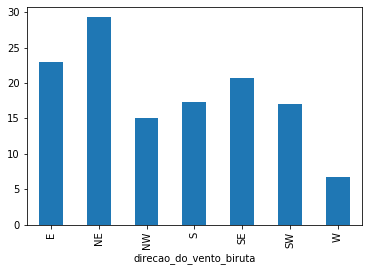

In [27]:
# Explorando a predominancia da direção dos ventos da biruta (anemometro)

dfmG.groupby(dfmG['direcao_do_vento_biruta'])['velocidade_media_vento'].mean().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000114F84D8CC8>,
      dtype=object)

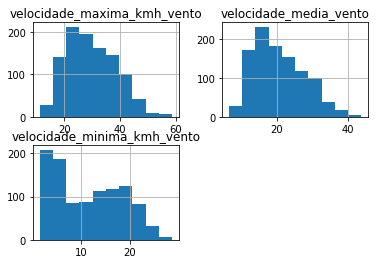

In [28]:
# Explorando a distribuição alguns dados da biruta

dfmG[['velocidade_minima_kmh_vento', 'velocidade_maxima_kmh_vento', 'velocidade_media_vento']].hist()

## MERGE ENTRE O DS DE SEGMENTOS DO STRAVA E DE VENTOS

In [29]:
dfG = pd.merge(df, dfmG, left_on='start_date', right_on='data_vento')

In [30]:
dfG.describe()

,average_speed,vse_average_heartrate,vse_average_watts,vse_distance,vse_elapsed_time,vse_max_heartrate,vse_moving_time,vse_elevation_high,vse_elevation_low,burn_calories,velocidade_minima_kmh_vento,velocidade_maxima_kmh_vento,grau_direcao_atual_vento,velocidade_media_vento
count,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000,1666.000000
mean,5.207344,131.801200,180.261405,3652.779652,718.091236,141.692677,639.357743,11.267647,0.227611,949.438369,14.007845,30.487358,119.909352,22.247601
std,0.495258,13.529626,35.749873,4136.893154,889.812058,13.696861,722.281791,7.017325,4.222088,121.541957,6.291035,8.452482,47.015990,6.951614
min,3.728000,67.700000,18.500000,166.600000,30.000000,68.000000,30.000000,-3.200000,-8.800000,400.469096,3.262412,13.813793,39.234750,8.591034
25%,5.078000,124.025000,159.825000,995.325000,162.000000,134.000000,162.000000,7.600000,-2.900000,900.295357,8.525996,23.601043,81.574457,17.154261
50%,5.388000,134.100000,183.600000,2664.150000,480.000000,144.000000,466.500000,9.800000,-0.400000,966.207705,15.197530,31.041186,115.224889,21.972383
75%,5.555000,141.800000,201.175000,5079.650000,940.750000,151.750000,906.750000,16.400000,2.000000,1034.617556,19.195347,37.016748,149.338448,28.188496
max,5.791000,159.400000,325.500000,22479.900000,5028.000000,173.000000,4345.000000,43.400000,31.200000,1151.674413,25.990889,49.309806,235.880624,37.650347


In [31]:
# Definindo a adversidade dos ventos da burita em função do segmento, por questões de prticidade estabeleci apenas
# a adversidade do Norte para o Sul e do Sul para o Norte

# 0 - Biruta para o Norte e segmento para o Sul
# 1 - Biruta para o Sul e segmento para o Norte
# NaN - Biuruta e segmento apontam para a mesma direção

def define_adverso(vBiruta, vSegmeto):
    if (vBiruta == 'NE' or vBiruta == 'N' or vBiruta == 'NW') and (vSegmeto == 'S' or vSegmeto == 'SE' or vSegmeto == 'SW'):
        return 0
    elif (vBiruta == 'SE' or vBiruta == 'S' or  vBiruta == 'SW') and (vSegmeto == 'NE' or vSegmeto == 'N' or vSegmeto == 'SW' or vSegmeto == 'NW'):
        return 1
    else:
        return 'NaN'
    
    
dfG['vento_adverso'] = dfG.apply(lambda x: define_adverso(x.direcao_do_vento_biruta, x.direcao_do_vento_segmento), axis=1)


In [32]:
dfG.groupby('vento_adverso').describe()

average_speed                                                  \
                      count      mean       std    min    25%    50%    75%   
vento_adverso                                                                 
0                     136.0  5.377662  0.299938  4.281  5.283  5.422  5.524   
1                     599.0  5.139873  0.535510  3.733  4.877  5.388  5.567   
NaN                   931.0  5.225874  0.483899  3.728  5.120  5.388  5.555   

                     vse_average_heartrate              ...  \
                 max                 count        mean  ...   
vento_adverso                                           ...   
0              5.675                 136.0  130.255147  ...   
1              5.791                 599.0  131.896828  ...   
NaN            5.791                 931.0  131.965521  ...   

              grau_direcao_atual_vento             velocidade_media_vento  \
                                   75%         max                  count   
vento_adverso                                                               
0                            55.653985   59.959199                  136.0   
1                           185.824243  235.880624                  599.0   
NaN                         127.739718  235.880624                  931.0   

                                                                     \
                    mean       std        min        25%        50%   
vento_adverso                                                         
0              29.234902  4.302166  22.555513  27.531100  28.565487   
1              19.690552  6.135449   8.591034  14.683796  19.466805   
NaN            22.872090  6.919811   8.591034  17.557656  23.062811   

                                     
                     75%        max  
vento_adverso                        
0              34.069791  36.269736  
1              22.974577  37.650347  
NaN            28.188496  37.650347  

[3 rows x 112 columns]

In [33]:
# Removendo os dados cujo os segmentos e direção dos ventos seja igual

dfG = dfG[dfG['vento_adverso'] != 'NaN']
dfG['vento_adverso'] = dfG['vento_adverso'].astype('float')

In [34]:
dfG.shape

(735, 20)

In [35]:
# agrupando por data, apenas as variaveis alvo para a correlação

dfG2 = dfG.groupby(dfG['start_date']).agg({'vse_average_heartrate':'mean',
                'vse_average_watts':'mean',
                'vse_distance':'mean',
                'vse_elapsed_time' : 'mean',
                'vse_max_heartrate':'mean',
                'vse_moving_time' : 'mean',
                'velocidade_media_vento' : 'mean',
                'average_speed':'mean'})

In [36]:
dfG2.shape

(42, 8)

In [37]:
dfG2.describe()

,vse_average_heartrate,vse_average_watts,vse_distance,vse_elapsed_time,vse_max_heartrate,vse_moving_time,velocidade_media_vento,average_speed
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,129.592704,182.668643,3058.439738,611.429772,139.283935,546.886457,21.829827,5.096024
std,13.740838,20.873538,1320.308745,246.886623,12.439718,209.577073,7.133907,0.570674
min,97.331250,126.837500,1663.233333,323.238095,105.583333,323.238095,8.591034,3.733000
25%,121.722500,168.250000,2256.848958,471.965909,129.783333,438.600758,15.335847,4.655250
50%,131.826389,185.920455,2604.992727,560.977273,142.449495,499.161818,21.932109,5.335500
75%,139.674574,196.348438,3037.384818,623.948052,148.022727,565.505625,27.139632,5.539000
max,151.737500,223.560000,6435.022222,1250.388889,159.062500,1114.555556,37.650347,5.791000


In [38]:
dfG2.corr(method='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)

,vse_average_heartrate,vse_average_watts,vse_distance,vse_elapsed_time,vse_max_heartrate,vse_moving_time,velocidade_media_vento,average_speed
vse_average_heartrate,1,0.4,0.1,-0.12,0.95,-0.045,0.061,0.59
vse_average_watts,0.4,1,0.43,0.14,0.52,0.22,-0.11,0.71
vse_distance,0.1,0.43,1,0.92,0.12,0.96,0.45,0.31
vse_elapsed_time,-0.12,0.14,0.92,1,-0.16,0.99,0.47,-0.033
vse_max_heartrate,0.95,0.52,0.12,-0.16,1,-0.066,0.0063,0.73
vse_moving_time,-0.045,0.22,0.96,0.99,-0.066,1,0.48,0.074
velocidade_media_vento,0.061,-0.11,0.45,0.47,0.0063,0.48,1,-0.0018
average_speed,0.59,0.71,0.31,-0.033,0.73,0.074,-0.0018,1


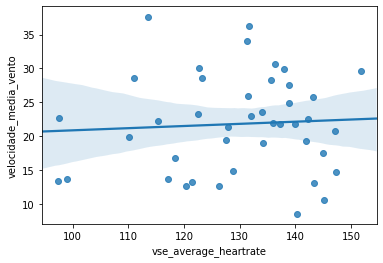

In [39]:
sns.regplot(x='vse_average_heartrate', y='velocidade_media_vento', data=dfG2)
